In [1]:
import datetime
import sys
from SPARQLWrapper import SPARQLWrapper, JSON
from rdflib.plugins.sparql.parser import parseQuery
import csv
import urllib
import itertools
import json
from matplotlib.colors import ListedColormap
import seaborn as sns
from matplotlib import colors
import numpy
import matplotlib.pyplot as plt


In [66]:

COUNT = 10_000

exclude = []
exclude.append("http://www.bigdata.com/")
exclude.append("http://www.bigdata.com/")

print("read tsv file...")

# total number of queries
sample_r = []
count = 0
with open("I7_status2xx_Joined.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t")
    for line in tsv_file:
        count = count + 1
        if count > 1:
            query = (
                urllib.parse.unquote_plus(line[0])
                .replace("> *", ">*")
                .replace("> / <", ">/<")
            )
            sample_r.append(query)
            # if 'http://www.bigdata.com/' not in query and 'wikibase:label' not in query:
            if count == 200001:
                break
print(len(sample_r))


def filter(x):
    return "http://www.bigdata.com" in x


sample_no_minus = itertools.filterfalse(filter, sample_r)
sample_no_minus = itertools.filterfalse(lambda x: "MINUS" in x, sample_no_minus)
sample_no_minus = itertools.islice(sample_no_minus, 10_000)
sample = [x for x in sample_no_minus]
print(len(sample))


read tsv file...
200000
10000


In [68]:
with open("query_dump.json", "w") as f:
    json.dump(sample, f, indent=2)

In [ ]:

print("read tsv file...")

# total number of queries
sample_r = []
count = 0
with open("I7_status2xx_Joined.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t")
    for line in tsv_file:
        count = count + 1
        if count > 1:
            query = (
                urllib.parse.unquote_plus(line[0])
                .replace("> *", ">*")
                .replace("> / <", ">/<")
            )
            sample_r.append(query)
            # if 'http://www.bigdata.com/' not in query and 'wikibase:label' not in query:
            if count == 200001:
                break
print(len(sample_r))


def filter(x):
    return "http://www.bigdata.com" in x or "MINUS" in x


sample_no_minus = itertools.filterfalse(filter, sample_r)
sample = [x for x in sample_no_minus]
print(len(sample))


9999 9999 11105 11105 9999 9999 10000
error qep: 56 error wd 7
sum_total_time1  3717.9631549999926
sum_total_time2  2912.5429250000097
np: 6.0 -6.0 0.14454909147317854 0.18526349999999997 9992
size: 99
9999 9999 10006 11105 9999 9999 10000
error qep: 46 error wd 1104
sum_total_time1  2467.121981
sum_total_time2  2305.93641000001
np: 6.0 -6.0 0.09484226498032602 0.15466899999999997 8895
size: 94
9999 9999 9999 11105 9999 9999 10000
error qep: 47 error wd 5357
sum_total_time1  3124.828093999986
sum_total_time2  2458.9825070000065
np: 6.0 -6.0 0.14178285609651012 0.1334845 4642
size: 68


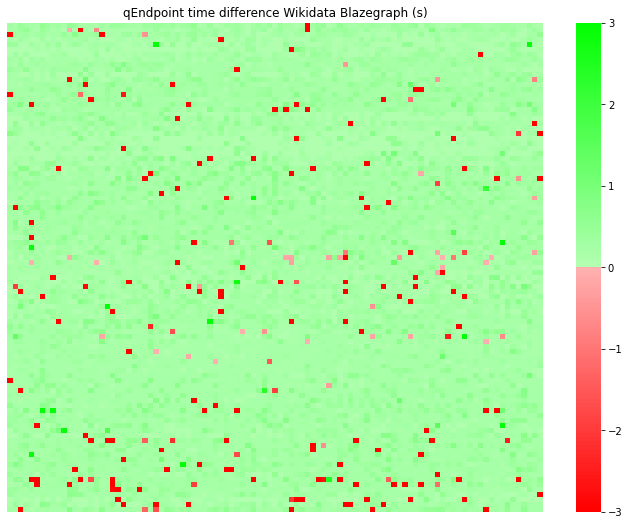

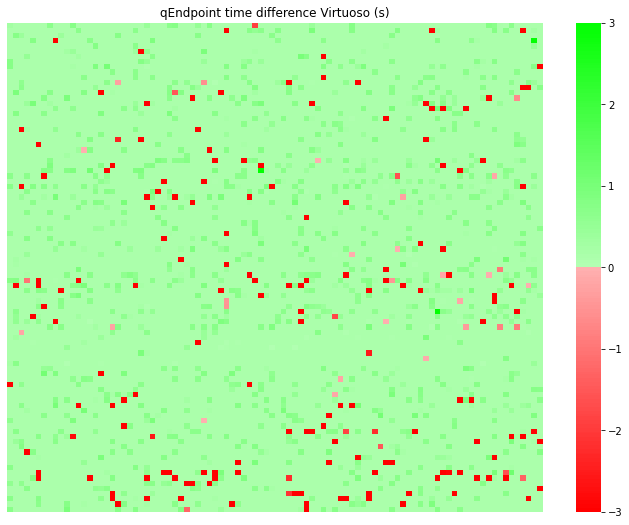

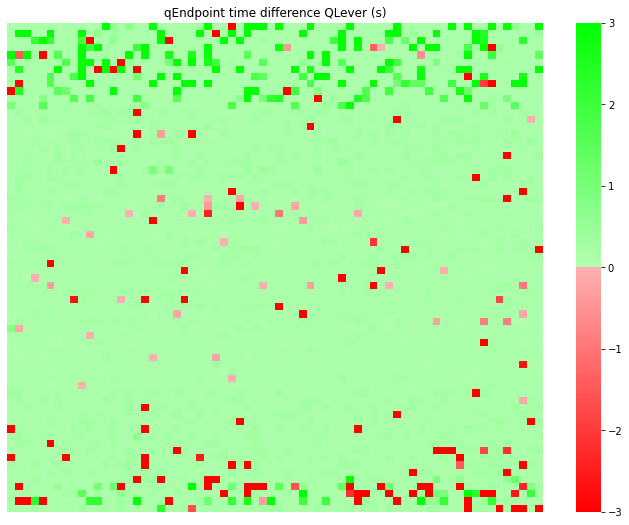

In [53]:
from math import sqrt


for file, title, abr in [
    ("result_wd_10k.json", "Wikidata Blazegraph", "Bla."),
    ("result_vs_10k.json", "Virtuoso", "Vir."),
    ("result_ql_10k.json", "QLever", "QLe."),
]:
    with open(file) as f:
        data = json.load(f)

    time1 = data["time1"]
    time2 = data["time2"]
    number_result1 = data["number_result1"]
    number_result2 = data["number_result2"]
    error1 = data["error1"]
    error2 = data["error2"]
    count = data["count"]

    print(
        len(time1),
        len(time2),
        len(number_result1),
        len(number_result2),
        len(error1),
        len(error2),
        count,
    )

    values = [0 for _ in range(12)]

    diff_time = []
    error_wd = 0
    error_qep = 0
    for i in range(0, len(time1)):
        if error1[i] and error2[i]:  # error on both
            # diff_time.append(-24)
            error_wd += 1
            error_qep += 1
            # values[14] +=1
        elif error1[i] or error2[i]:
            if error1[i]:  # error on wd
                # diff_time.append(12)
                error_wd += 1
                # values[13] +=1
            else:  # error on qep
                diff_time.append(-6)
                error_qep += 1
                # values[12] +=1
        else:
            dtte = max(min((time1[i] - time2[i]) / 1000, 6), -6)
            values[int(dtte)] += 1

            diff_time.append(dtte)
    print("error qep:", error_qep, "error wd", error_wd)

    sum_total_time1 = 0
    for i in range(0, len(time1)):
        sum_total_time1 += time1[i]
    sum_total_time1 = sum_total_time1 / 1000
    print("sum_total_time1 ", sum_total_time1)

    sum_total_time2 = 0
    for i in range(0, len(time2)):
        sum_total_time2 += time2[i]
    sum_total_time2 = sum_total_time2 / 1000
    print("sum_total_time2 ", sum_total_time2)

    diff_number = []
    for i in range(0, len(number_result1)):
        diff_number.append(number_result1[i] - number_result2[i])

    arr = numpy.array(diff_time)
    print(
        "np:",
        numpy.max(arr),
        numpy.min(arr),
        numpy.mean(arr),
        numpy.median(arr),
        len(diff_time),
    )
    sq_size = int(sqrt(len(diff_time)))
    print("size:", sq_size)

    fig = plt.figure(figsize=(12, 9))

    def get_custom_color_palette():
        return ListedColormap(
            [
                *[(1, 0, 0, alpha) for alpha in numpy.arange(1, 0.3, -0.01)],
                *[(0, 1, 0, alpha) for alpha in numpy.arange(0.3, 1, 0.01)],
            ]
        )

    arr = numpy.reshape(arr[: sq_size * sq_size], (sq_size, sq_size), order="C")
    # print(arr)
    # fig, axis = plt.subplots(figsize = (12, 9))
    # ax.hist(diff_time, bins = 200, align='mid', color='yellow', edgecolor='black', linewidth=2)
    ax = sns.heatmap(arr, cmap=get_custom_color_palette(), center=0, vmax=3, vmin=-3)
    ax.set_title("qEndpoint time difference " + title + " (s)")
    ax.set_axis_off()
    plt.savefig("values " + title + ".png")


In [59]:



for file, title, abr in [
    ("result_wd_10k.json", "Wikidata Blazegraph", "Bla."),
    ("result_vs_10k.json", "Virtuoso", "Vir."),
    ("result_ql_10k.json", "QLever", "QLe."),
]:
    with open(file) as f:
        data = json.load(f)
    error1 = map(lambda x: 1 if x else 0, data["error1"])
    error2 = map(lambda x: 1 if x else 0, data["error2"])

    print("----", title, "----")
    print("Error", abr, sum(error1))
    print("Error QEp.", sum(error2))
    print("-------------------")
    
    

---- Wikidata Blazegraph ----
Error Bla. 7
Error QEp. 56
-------------------
---- Virtuoso ----
Error Vir. 1104
Error QEp. 46
-------------------
---- QLever ----
Error QLe. 5357
Error QEp. 47
-------------------
